In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Collecting The Data

In [2]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210828, 210821, 210814,210807, 210731, 210724, 210717, 210710,210703,210626,210619,210612,210605 ]
df = get_data(week_nums)

In [3]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,00:00:00,REGULAR,7622548,2607689
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,04:00:00,REGULAR,7622561,2607697
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,08:00:00,REGULAR,7622573,2607718
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,12:00:00,REGULAR,7622604,2607766
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,16:00:00,REGULAR,7622715,2607802


# Convert the Dataset to SQL Database

In [4]:
# Convert to sql database # Conver to sql database 
engine = create_engine("sqlite:///MTA_NEW.db")
sqlite_connection = engine.connect()
df.to_sql('MTA_Table', con=sqlite_connection, index=False, if_exists='replace')

In [5]:
# Read the MTA_Table
engine = create_engine("sqlite:///MTA_NEW.db")
engine.table_names()

<ipython-input-5-7f425205468a>:3: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['MTA_Table']

In [6]:
df = pd.read_sql('SELECT * FROM MTA_Table;', engine)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,00:00:00,REGULAR,7622548,2607689
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,04:00:00,REGULAR,7622561,2607697
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,08:00:00,REGULAR,7622573,2607718
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,12:00:00,REGULAR,7622604,2607766
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/21/2021,16:00:00,REGULAR,7622715,2607802


# Explore the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2722610 entries, 0 to 2722609
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                          

In [9]:
df.isna().sum()

CA                                                                      0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [8]:
df.rename(columns={"C/A": "CA"}, inplace=True)

In [ ]:
df

In [ ]:
df.SCP.unique()

In [ ]:
df.DESC.unique()

In [ ]:
len(df.STATION.unique())

In [ ]:
len(df.DATE.unique())

# Pre-processing and Data cleaning 

In [10]:
daily = (df
                        .groupby(["CA", "UNIT", "SCP", "STATION", "DATE","TIME"],as_index=False)
                        .ENTRIES.first())

In [ ]:
#drop null values and negative values

In [11]:
daily["DAILY_ENTRIES"] = (daily
                                     .groupby(["CA", "UNIT", "SCP", "STATION","TIME"])[["ENTRIES"]]
                                     .diff())
daily.dropna(subset=["DAILY_ENTRIES"], axis=0, inplace = True)
daily.drop(daily[daily.DAILY_ENTRIES<0].index,inplace = True)
daily.head()

,CA,UNIT,SCP,STATION,DATE,TIME,ENTRIES,DAILY_ENTRIES
6,A002,R051,02-00-00,59 ST,05/30/2021,00:00:00,7579078,344.0
7,A002,R051,02-00-00,59 ST,05/30/2021,04:00:00,7579084,344.0
8,A002,R051,02-00-00,59 ST,05/30/2021,08:00:00,7579085,336.0
9,A002,R051,02-00-00,59 ST,05/30/2021,12:00:00,7579093,304.0
10,A002,R051,02-00-00,59 ST,05/30/2021,16:00:00,7579165,268.0


In [15]:
daily

,CA,UNIT,SCP,STATION,DATE,TIME,ENTRIES,DAILY_ENTRIES
6,A002,R051,02-00-00,59 ST,05/30/2021,00:00:00,7579078,344.0
7,A002,R051,02-00-00,59 ST,05/30/2021,04:00:00,7579084,344.0
8,A002,R051,02-00-00,59 ST,05/30/2021,08:00:00,7579085,336.0
9,A002,R051,02-00-00,59 ST,05/30/2021,12:00:00,7579093,304.0
10,A002,R051,02-00-00,59 ST,05/30/2021,16:00:00,7579165,268.0
...,...,...,...,...,...,...,...,...
2722576,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/27/2021,05:00:00,5554,0.0
2722577,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/27/2021,09:00:00,5554,0.0
2722578,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/27/2021,13:00:00,5554,0.0
2722579,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/27/2021,17:00:00,5554,0.0


In [ ]:
#Assign daily entries column to the original dataset

In [16]:
df["daily"]= daily["DAILY_ENTRIES"]
df.dropna(subset=["daily"], axis=0, inplace= True)
df

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,daily
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,00:00:00,REGULAR,7622923,2607848,2021-08-22 00:00:00,344.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,04:00:00,REGULAR,7622927,2607851,2021-08-22 04:00:00,344.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,08:00:00,REGULAR,7622936,2607860,2021-08-22 08:00:00,336.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,12:00:00,REGULAR,7622963,2607888,2021-08-22 12:00:00,304.0
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,16:00:00,REGULAR,7623020,2607912,2021-08-22 16:00:00,268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722576,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/30/2021,09:00:00,REGULAR,5554,577,2021-05-30 09:00:00,0.0
2722577,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/30/2021,13:00:00,REGULAR,5554,577,2021-05-30 13:00:00,0.0
2722578,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/30/2021,17:00:00,REGULAR,5554,577,2021-05-30 17:00:00,0.0
2722579,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/30/2021,21:00:00,REGULAR,5554,577,2021-05-30 21:00:00,0.0


In [17]:
df["DATE_TIME"]= pd.to_datetime(df.DATE + " " + df.TIME, format='%m/%d/%Y %H:%M:%S')

In [18]:
df

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,daily
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,00:00:00,REGULAR,7622923,2607848,2021-08-22 00:00:00,344.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,04:00:00,REGULAR,7622927,2607851,2021-08-22 04:00:00,344.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,08:00:00,REGULAR,7622936,2607860,2021-08-22 08:00:00,336.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,12:00:00,REGULAR,7622963,2607888,2021-08-22 12:00:00,304.0
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,16:00:00,REGULAR,7623020,2607912,2021-08-22 16:00:00,268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722576,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/30/2021,09:00:00,REGULAR,5554,577,2021-05-30 09:00:00,0.0
2722577,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/30/2021,13:00:00,REGULAR,5554,577,2021-05-30 13:00:00,0.0
2722578,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/30/2021,17:00:00,REGULAR,5554,577,2021-05-30 17:00:00,0.0
2722579,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/30/2021,21:00:00,REGULAR,5554,577,2021-05-30 21:00:00,0.0


In [20]:
# remove RECOVER AUD rows
df= df[df.DESC != "RECOVR AUD"]

In [21]:
df.DESC.unique()

array(['REGULAR'], dtype=object)

In [22]:
#drop DESC column because its useless for our situation 
df.drop(columns='DESC', inplace= True)

C:\Users\noody\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
#drop duplicates data
df.drop_duplicates()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,daily
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,00:00:00,7622923,2607848,2021-08-22 00:00:00,344.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,04:00:00,7622927,2607851,2021-08-22 04:00:00,344.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,08:00:00,7622936,2607860,2021-08-22 08:00:00,336.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,12:00:00,7622963,2607888,2021-08-22 12:00:00,304.0
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,16:00:00,7623020,2607912,2021-08-22 16:00:00,268.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2722576,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/30/2021,09:00:00,5554,577,2021-05-30 09:00:00,0.0
2722577,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/30/2021,13:00:00,5554,577,2021-05-30 13:00:00,0.0
2722578,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/30/2021,17:00:00,5554,577,2021-05-30 17:00:00,0.0
2722579,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/30/2021,21:00:00,5554,577,2021-05-30 21:00:00,0.0


In [ ]:
#clean daily column from the outliers

In [45]:
Q1 = df["daily"].quantile(0.25)
Q3 = df["daily"].quantile(0.75)
IQR = Q3 - Q1

In [46]:
df_clean = df.drop(df[df["daily"]> ( Q3 + (IQR*1.5) )].index)

In [47]:
df_clean

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,daily
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,00:00:00,7622923,2607848,2021-08-22 00:00:00,344.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,04:00:00,7622927,2607851,2021-08-22 04:00:00,344.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,08:00:00,7622936,2607860,2021-08-22 08:00:00,336.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,12:00:00,7622963,2607888,2021-08-22 12:00:00,304.0
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,16:00:00,7623020,2607912,2021-08-22 16:00:00,268.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2722576,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/30/2021,09:00:00,5554,577,2021-05-30 09:00:00,0.0
2722577,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/30/2021,13:00:00,5554,577,2021-05-30 13:00:00,0.0
2722578,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/30/2021,17:00:00,5554,577,2021-05-30 17:00:00,0.0
2722579,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/30/2021,21:00:00,5554,577,2021-05-30 21:00:00,0.0


# The Solution 

Generate Top 5 stations in daily entries 

In [95]:
 df_clean.groupby(["STATION"]).daily.sum().sort_values(ascending=False)

STATION
34 ST-PENN STA     17273131.0
FULTON ST          13068301.0
GRD CNTRL-42 ST    12435262.0
23 ST              11025904.0
86 ST              10669189.0
                      ...    
219 ST               373263.0
225 ST               334494.0
INTERVALE AV         319990.0
CLEVELAND ST         305062.0
SUTTER AV            292845.0
Name: daily, Length: 379, dtype: float64

In [108]:
STATION_5=(df_clean.groupby(["STATION"]).daily.sum().sort_values(ascending=False)).head(5)
STATION_5

STATION
34 ST-PENN STA     17273131.0
FULTON ST          13068301.0
GRD CNTRL-42 ST    12435262.0
23 ST              11025904.0
86 ST              10669189.0
Name: daily, dtype: float64

# The Graph

In [126]:
S5=STATION_5.to_frame().reset_index()
S5

,STATION,daily
0,34 ST-PENN STA,17273131.0
1,FULTON ST,13068301.0
2,GRD CNTRL-42 ST,12435262.0
3,23 ST,11025904.0
4,86 ST,10669189.0


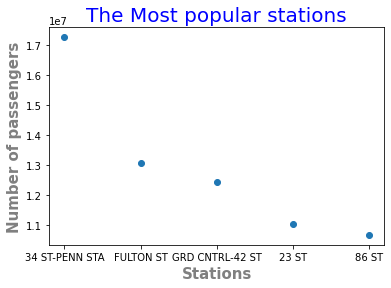

In [127]:
plt.scatter(S5["STATION"],S5["daily"])
plt.title('The Most popular stations', family='sans-serif',fontsize =20, color='blue',loc='center')
plt.xlabel('Stations',fontsize = 15, weight = 'bold',color='gray')
plt.ylabel('Number of passengers',fontsize = 15, weight = 'bold',color='gray');


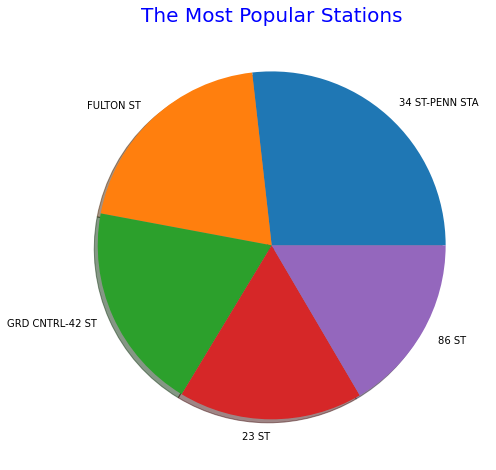

In [195]:
plt.figure(figsize = [10,8])
plt.pie(S5["daily"],labels=["34 ST-PENN STA","FULTON ST","GRD CNTRL-42 ST","23 ST","86 ST"],shadow = True)
plt.title('The Most Popular Stations', family='sans-serif',fontsize =20, color='blue',loc='center')
plt.savefig('pie.png')

The Obeservation 

The graph shows the relationship between the number of passengers at the most popular stations. 34 ST-PENN STA station has the most passengers which have 17273131.0 passenger.

In [ ]:
df["DATE_TIME"]= pd.to_datetime(df.DATE + " " + df.TIME, format='%m/%d/%Y %H:%M:%S')

In [ ]:
df

In [129]:
#0:00 to 4:00 = 1
#4:00 to 8:00 = 2
#8:00 to 12:00 = 3
#12:00 to 16:00 = 4
#16:00 to 20:00 = 5
#20:00 to 24:00 =6
df["TIME_INTERVAL"]= (
    np.where( (df.DATE_TIME.dt.hour <= 4), "1" 
    ,np.where((df.DATE_TIME.dt.hour <= 8 ), "2" 
    ,np.where((df.DATE_TIME.dt.hour <= 12), "3"
    , np.where((df.DATE_TIME.dt.hour<= 16), "4"
    , np.where((df.DATE_TIME.dt.hour<= 20), "5" 
             , "6"
            ))))))

<ipython-input-129-bbe8f4937c07>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TIME_INTERVAL"]= (


In [130]:
df

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,daily,TIME_INTERVAL
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,00:00:00,7622923,2607848,2021-08-22 00:00:00,344.0,1
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,04:00:00,7622927,2607851,2021-08-22 04:00:00,344.0,1
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,08:00:00,7622936,2607860,2021-08-22 08:00:00,336.0,2
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,12:00:00,7622963,2607888,2021-08-22 12:00:00,304.0,3
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2021,16:00:00,7623020,2607912,2021-08-22 16:00:00,268.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722576,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/30/2021,09:00:00,5554,577,2021-05-30 09:00:00,0.0,3
2722577,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/30/2021,13:00:00,5554,577,2021-05-30 13:00:00,0.0,4
2722578,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/30/2021,17:00:00,5554,577,2021-05-30 17:00:00,0.0,5
2722579,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/30/2021,21:00:00,5554,577,2021-05-30 21:00:00,0.0,6


In [ ]:
# the second graph by mohammed

In [106]:
df_daily = df_clean.groupby(["STATION","DATE"]).daily.sum().reset_index()
df_daily["DATE"] = pd.to_datetime(df_daily.DATE)

In [107]:
df_daily.DATE.dt.weekday

0        5
1        6
2        0
3        1
4        2
        ..
33228    0
33229    1
33230    2
33231    3
33232    4
Name: DATE, Length: 33233, dtype: int64

In [143]:
 daily_byhours=df_clean.groupby(["hours"]).daily.sum().reset_index()
daily_byhours

,hours,daily
0,1,206535980.0
1,2,133685923.0
2,3,134084309.0
3,4,133922370.0
4,5,134151286.0
5,6,60351645.0


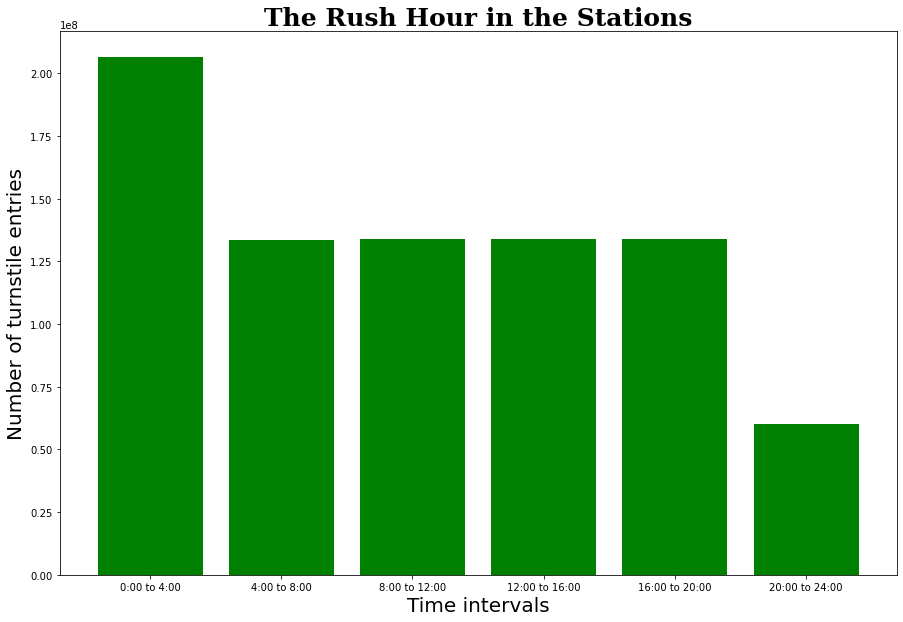

In [191]:
plt.figure(figsize = [15,10]) # [width, height]
plt.bar(daily_byhours['hours'],daily_byhours['daily'], color='green')
plt.title("The Rush Hour in the Stations", family='serif', fontsize='25', weight = 'bold')
plt.xticks(np.arange(6),['0:00 to 4:00','4:00 to 8:00','8:00 to 12:00','12:00 to 16:00','16:00 to 20:00','20:00 to 24:00'])
plt.xlabel('Time intervals', fontsize= 20, color= 'black')
plt.ylabel('Number of turnstile entries',fontsize = 20 ,color='black');
plt.savefig("rush_hour.png")

In [110]:
top_5_st = df_daily.groupby("STATION").daily.sum().sort_values(ascending=False)[:5].index.to_list()

In [111]:
df_daily["day"] = df_daily.DATE.dt.weekday

In [112]:
Top_5 = df_daily[df_daily.STATION.isin(top_5_st)].groupby(["STATION","day"]).daily.sum().reset_index()

In [113]:
Top_5.head(2)

,STATION,day,daily
0,23 ST,0,1566437.0
1,23 ST,1,1553590.0


In [115]:
top_5_only = df_daily.groupby("day").daily.sum().reset_index()
top_5_only

,day,daily
0,0,116108508.0
1,1,116504621.0
2,2,114278294.0
3,3,113326131.0
4,4,113682629.0
5,5,114156030.0
6,6,114675300.0


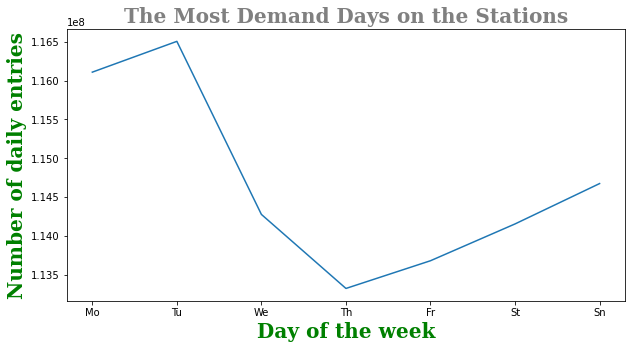

In [199]:
plt.figure(figsize = [10,5]) # [width, height]
plt.plot(top_5_only['day'], top_5_only['daily'])
plt.xlabel('Day of the week', family='serif', c='green', weight='bold',fontsize = 20)
plt.ylabel('Number of daily entries',family='serif',c='green', weight='bold',fontsize = 20)
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('The Most Demand Days on the Stations',family='serif',fontsize = 20, c='gray', weight='bold')
plt.savefig('days.png')